In [1]:
%run ./../data/load-dataset.ipynb
%run ./../homegrown/basic-neural-network.ipynb
%run ./../doc2vec/load-d2v-model.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
ITERS = 100

RANDOM_SEED = 0

In [4]:
corpus, labels = df[[proc_doc_col, label_col]].T.values
X = np.array([d2v_model.dv[i] for i in range(len(corpus))])
y = np.array([np.eye(2)[int(label)] for label in labels])
train_samples, test_samples, train_labels, test_labels = train_test_split(X, y, random_state=RANDOM_SEED)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, input_dim=300, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(80, activation=tf.nn.relu))
model.add(Dense(2, activation=tf.nn.softmax))
# gradient descent optimizer
solver = SGD(learning_rate=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
# configure the learning process of the model
model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_samples, train_labels, epochs=ITERS, batch_size=32)
model.evaluate(test_samples, test_labels, verbose=True)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6890 - accuracy: 0.5733
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6348 - accuracy: 0.6387: 0s - loss: 0.6357 - accura
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6102 - accuracy: 0.6690
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5972 - accuracy: 0.6793: 0s - loss:
Epoch 5/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5887 - accuracy: 0.6882
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5831 - accuracy: 0.6904 0s - loss: 0.5832 - accuracy
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5765 - accuracy: 0.6982: 0s - loss: 0.5769 - ac
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5724 - accuracy: 0.7006
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.56

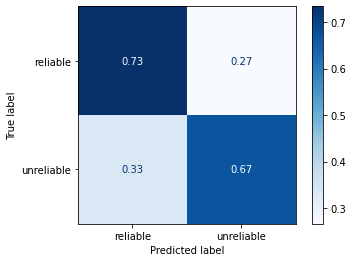

In [6]:
normalize = 'true'

true_preds, true_labels = [np.argmax(pred) for pred in model.predict(test_samples)], \
                          [np.argmax(label) for label in test_labels]
ConfusionMatrixDisplay.from_predictions(true_labels, true_preds, normalize=normalize,
                                        cmap=plt.cm.Blues, display_labels=('reliable', 'unreliable'))